In [106]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [107]:
wine_data = pd.read_csv("winequalityN.csv")

In [108]:
wine_data.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [109]:
wine_data.shape

(6497, 13)

In [110]:
wine_data.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [111]:
wine_data.duplicated().sum()

np.int64(1168)

In [112]:
wine_data.drop_duplicates(inplace=True)

In [113]:
wine_data.shape

(5329, 13)

In [114]:
wine_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Figure size 500x500 with 0 Axes>

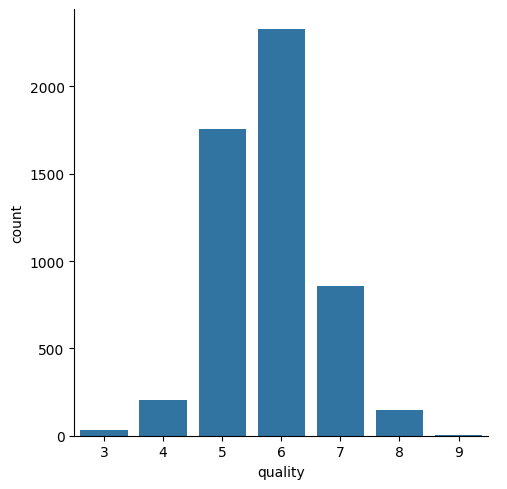

In [115]:
plt.figure(figsize=(5,5))
sns.catplot(x='quality',data=wine_data,kind='count')

In [116]:
wine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5319.0,7.216573,1.319194,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5321.0,0.344123,0.168228,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5326.0,0.318738,0.147116,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5327.0,5.053839,4.504005,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5327.0,0.056668,0.036845,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5329.0,30.060143,17.815588,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5329.0,114.189341,56.781422,6.00000,75.0000,116.00000,154.00000,440.00000
density,5329.0,0.994536,0.002966,0.98711,0.9922,0.99464,0.99677,1.03898
pH,5320.0,3.224434,0.160275,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5325.0,0.533268,0.149724,0.22000,0.4300,0.51000,0.60000,2.00000


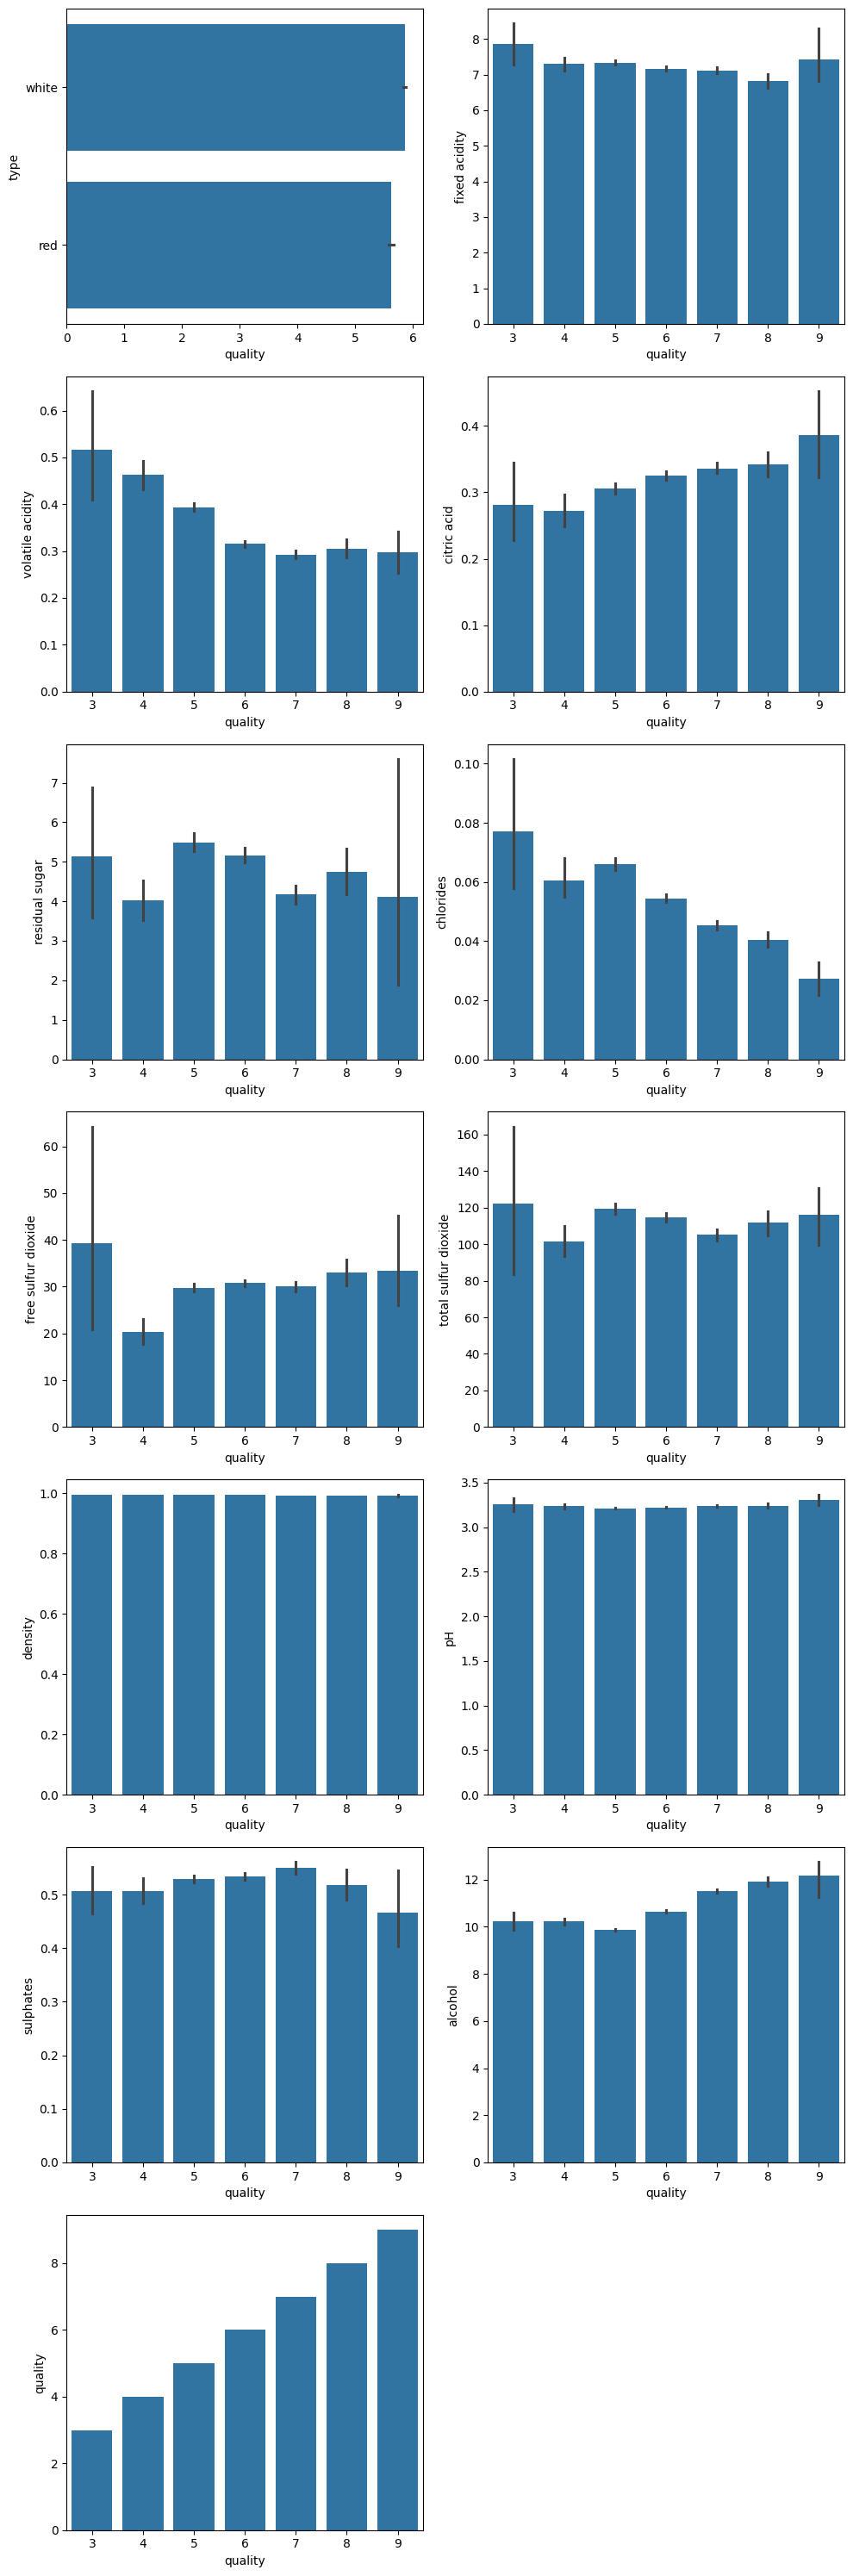

In [119]:
plt.figure(figsize=(10, 30))
for i, column in enumerate(wine_data.columns):
    plt.subplot(7, 2, i+1)  # 7*2 = 14 -> enough for 13 columns
    sns.barplot(x='quality', y=column, data=wine_data)
plt.tight_layout()
plt.show()


In [121]:
# Convert 'type' column: white=1, red=0
wine_data['type'] = wine_data['type'].replace({'white': 1, 'red': 0})


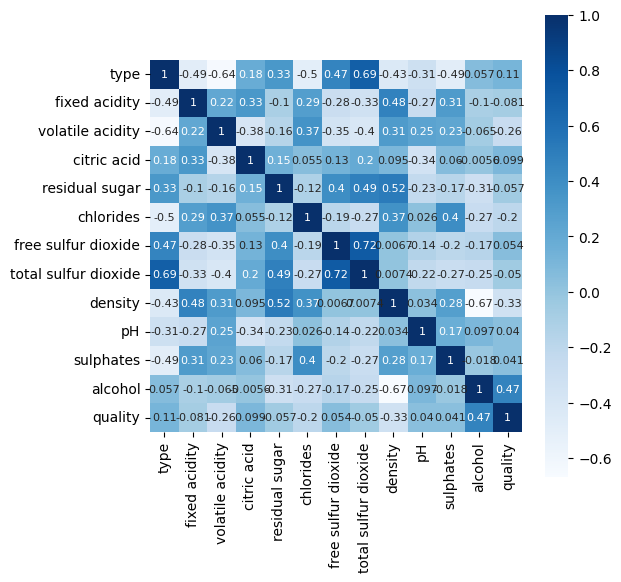

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.heatmap(wine_data.corr(), annot=True, square=True,
            cbar=True, cmap='Blues',
            annot_kws={'size':8})
plt.show()


In [123]:
wine_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,1,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [124]:
input = wine_data.drop(columns = ['quality'])
output = wine_data['quality']

In [125]:
input

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
6,1,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [126]:
output

,quality
0,6
1,6
2,6
3,6
6,6
...,...
6491,6
6492,5
6493,6
6495,5


In [128]:
output.value_counts()


,count
quality,
6,2327
5,1755
7,857
4,206
8,149
3,30
9,5


In [129]:
output = wine_data['quality'].apply(lambda x:1  if x>=7 else 0)

In [130]:
output.value_counts()

,count
quality,
0,4318
1,1011


In [131]:
input

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
6,1,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [132]:
output

,quality
0,0
1,0
2,0
3,0
6,0
...,...
6491,0
6492,0
6493,0
6495,0


In [133]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)

In [134]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4263, 12) (1066, 12) (4263,) (1066,)


In [135]:
model = RandomForestClassifier()

In [136]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [137]:
pred = model.predict(x_test)

In [138]:
pred

array([0, 0, 0, ..., 1, 0, 0])

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accuracy_score(y_test,pred)

0.8217636022514071

In [141]:
input = [6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6]

In [142]:
input_shape = np.array(input).reshape(1,-1)
model.predict(input_shape)

array([0])

In [143]:
def predict(model_name,input):
  input_shape = np.array(input).reshape(1,-1)
  result = model_name.predict(input_shape)
  if result[0] == 1:
    print("Good Quality Wine")
  else:
    print("Bad Quality Wine")

In [144]:
predict(model,[7.4,0.785,0.19,5.2,0.094,19,98,0.99713,3.16,0.52,9.566666667,6])

Bad Quality Wine
